In [1]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt

In [116]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list

In [117]:
#Create dummy data
# 8:{"location":(0,0),"tag":"WO6","building":"BK","size":2,"type":"W2"}
# 1:{"location":(0,0),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1}

vacant_spaces = {
"V1":{"location":(0,5),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1, "node_type":"vacant"}, 
"V2":{"location":(10,2),"tag":"V2","building":"BK","size":3,"structure":3,"solar":3, "node_type":"vacant"},
"V3":{"location":(2,7),"tag":"V3","building":"BK","size":2,"structure":3,"solar":3, "node_type":"vacant"},
"V4":{"location":(4,8),"tag":"V4","building":"BK","size":1,"structure":1,"solar":3, "node_type":"vacant"},
"V5":{"location":(2,3),"tag":"V5","building":"BK","size":1,"structure":1,"solar":3, "node_type":"vacant"},
"V6":{"location":(4,4),"tag":"V6","building":"BK","size":1,"structure":2,"solar":1, "node_type":"vacant"}}

wastes = {
"WO1":{"location":(0,0),"tag":"WO1","building":"BK","size":3,"type":"W1", "node_type":"waste"}, 
"WO2":{"location":(8,1),"tag":"WO2","building":"BK","size":3,"type":"W3", "node_type":"waste"},
"WO3":{"location":(1,7),"tag":"WO3","building":"BK","size":2,"type":"W4", "node_type":"waste"},
"WO4":{"location":(2,6),"tag":"WO4","building":"BK","size":3,"type":"W2", "node_type":"waste"},
"WO5":{"location":(4,5),"tag":"WO5","building":"BK","size":3,"type":"W5", "node_type":"waste"},
"WO6":{"location":(3,2),"tag":"WO6","building":"BK","size":2,"type":"W5", "node_type":"waste"},
"WO7":{"location":(2,4),"tag":"WO7","building":"BK","size":2,"type":"W5", "node_type":"waste"},
"WO8":{"location":(10,3),"tag":"WO8","building":"BK","size":2,"type":"W5", "node_type":"waste"},
"WO9":{"location":(10,1),"tag":"WO9","building":"BK","size":3,"type":"W6", "node_type":"waste"}}

# nearby_waste = (("V1","WO5"),("V1","WO6"),("V1","WO7"),("V1","WO9"),("V3","WO1"),("V3","WO5"),("V5","WO3"),("V6","WO6"),("V6","WO3"),("V6","WO6"),("V6","WO7"))

In [118]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"S","weight":3,"solar":2,"in":["W7"],"supplement":["S3","S5","S6"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":["S1"],"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S1"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]}
}

In [119]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
print(v_potential)

{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V2': {'tag': 'V2', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V3': {'tag': 'V3', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}


(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
{'V1': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V2': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V3': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V4': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V5': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V6': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9']}


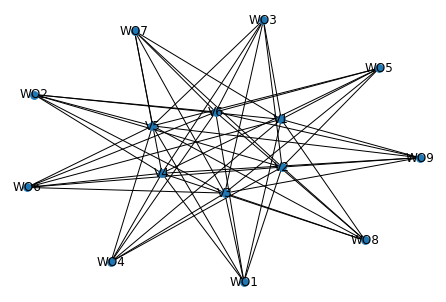

In [139]:
#Draw graph from "vacant_spaces" and "waste" nodes with the given nearby nodes


G=nx.Graph()
for i,j in wastes.items():
    G.add_node(wastes[i]["tag"],pos=(0,0))
    location1 = wastes[i]["location"]
for i,j in vacant_spaces.items():
    location2 = vacant_spaces[i]["location"]
    print(location)
    G.add_node(vacant_spaces[i]["tag"],pos=location2)
G.add_edges_from(nearby_waste)
nx.draw(G, with_labels=True, node_size=60)

# Create a dictionary with vacant spaces and waste outputs near them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    new_list = []
    if i in vacant_spaces:
        waste_dict[i]=k
print (waste_dict)

{'WO1': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO2': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO3': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO4': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO5': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO6': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO7': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO8': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'WO9': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'V1': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V2': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V3': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V4': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V5': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V6': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9']}
WO1 is not vacant space
WO2 is not vacant space
WO3 is not vacant space
WO4 is not vacant space
WO5 is not vacant space
WO6 is not vacant space
WO7 is not vacant space


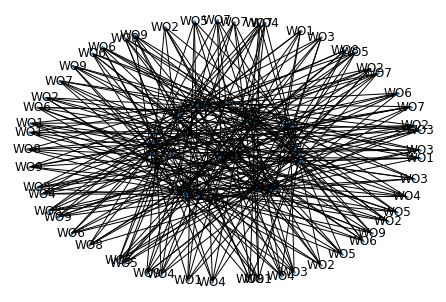

In [130]:
# For each vacant space find wastes within radius=1
new_list=[]
for nodes in G.nodes():
    for i,j in vacant_spaces.items():
        if nodes == vacant_spaces[i]["tag"]:
            new_list.append(nodes)
# print(new_list)
for i in new_list:
    # print(i, "is i")
    G_close = nx.ego_graph(G,i,radius=7)
    nx.draw(G_close, with_labels=True, node_size=2)
    edge_dictionary=create_edge_dict(G_close)
print(edge_dictionary)

waste_nearby={}
for m,n in vacant_spaces.items():
    for i,k in edge_dictionary.items():
        if i!=vacant_spaces[m]["tag"]:
            print(i, "is not vacant space")
        else:
            print(i, "is vacant space")
            waste_nearby[i]=k

###### include waste types!!!!!!

print(waste_nearby)

In [122]:
#List of dictionaries we will use:
print(v_potential)
print(waste_dict)
print(uf_systems)

{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V2': {'tag': 'V2', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V3': {'tag': 'V3', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}
{'V1': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V2': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V3': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V4': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V5': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9'], 'V6': ['WO1', 'WO2', 'WO3', 'WO4', 'WO5', 'WO6', 'WO7', 'WO8', 'WO9']}
{'UF1': {'tag': 'UF1', 'type': 'S', 'weight': 3, 'solar': 1, 'in': ['W1', 'W2', 'W3', 'W6'], 'supplement': None, 'out': ['S4', 'S5']}, 'UF2': {'tag': 'UF2', 'type': 'S', 'weight': 3, 'solar': 2, 'in': ['W7'], 'supplement': ['S3', 'S5', 'S6'], 'out': ['O4', 'S2']}, 

In [123]:
# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}

for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]
       
print(v_potential_dict)    

{'V1': {'UF3': ['W2', 'W3', 'W4', 'W6'], 'UF8': ['W5', 'W6']}, 'V2': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF6': ['W6'], 'UF7': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6', 'W7']}, 'V3': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF6': ['W6'], 'UF7': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6', 'W7']}, 'V4': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6', 'W7']}, 'V5': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6', 'W7']}, 'V6': {'UF3': ['W2', 'W3', 'W4', 'W6']}}


#Design Rule 1.0 : Waste Availability
    #if there are more than 2 found items assign that system to that vacant space

In [124]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    # print(i, "is space")
    for system,demanded in k.items():
        # print(system, demanded)
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        # found_dict[i][system]["missing"]={}
        # print("for",system,demanded,"is needed")
        found=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                # print("for",system, "in",i, demanded, "is needed",available, "is available")
                if each == available:
                    # print ("found",each)
                    found.append(available)
                    found_dict[i][system]["found"]=found
                # else:
                #     missing.append(each)
                #     found_dict[i][system]["missing"]=missing

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#Remove repeating items
for i,k in found_dict.items():
    for system in k:
        found_items = found_dict[i][system]["found"]
        duplicate=list_duplicates(found_items)
        for found in found_items:
            if found in duplicate:
                found_items.remove(found)

print (found_dict)


{'V1': {'UF3': {'found': ['W3', 'W4', 'W2', 'W6'], 'missing': []}, 'UF8': {'found': ['W5', 'W5', 'W6'], 'missing': []}}, 'V2': {'UF4': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF5': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF6': {'found': ['W6'], 'missing': []}, 'UF7': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF9': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}}, 'V3': {'UF4': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF5': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF6': {'found': ['W6'], 'missing': []}, 'UF7': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF9': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}}, 'V4': {'UF4': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF5': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF9': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}}, 'V5': {'UF4': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF5': {'found': ['W5', 'W5', 'W6'], 'missing': ['W7']}, 'UF9': {'found': ['W5', '

In [125]:
# Apply Design Rule 1.0

occupied_space = {}
for i,k in found_dict.items():
    occupied_space[i] = {}
    occupied_space[i]["system"]={}
    occ_system = []
    for system in k:
        found_items = found_dict[i][system]["found"]
        missing_items = found_dict[i][system]["missing"]
        if len(found_items)>=2:
            occ_system.append(system)
            occupied_space[i]["system"] = occ_system

# Improve Design Rule 1.0:
    # Minimising Missing Items
    # If more than 1 system can be assigned to the space, select the one with the least amount of missing items

no_missing_items = {}
one_missing_item = {}
two_missing_items = {}
for i,k in occupied_space.items():
    best_option = []
    for item in occupied_space[i]["system"]:
        
        for space,items in found_dict.items():
            no_missing_items[space]={}
            no_missing_items[space]["system"]={}
            one_missing_item[space]={}
            one_missing_item[space]["system"]={}
            two_missing_items[space]={}
            two_missing_items[space]["system"]={}
            occ_system_0 = []
            occ_system_1 = []
            occ_system_2 = []
            for system in items:
                missing = found_dict[space][system]["missing"]
                if len(missing)==0:
                    print(space,"-",system,"-","no missing items")
                    occ_system_0=system
                    no_missing_items[space]["system"] = occ_system_0
                    occupied_space[i]["system"] = occ_system_0
                elif len(missing)==1:
                    print(space,"-",system,"-","one missing item:", missing)
                    occ_system_1=system
                    one_missing_item[space]["system"]= occ_system_1
                elif len(missing)==2:
                    print(space,"-",system,"-","two missing items:", missing)
                    occ_system_2=system
                    two_missing_items[space]["system"]= occ_system_2

print(no_missing_items)
print(one_missing_item)
print(two_missing_items)

print(occupied_space)

V1 - UF3 - no missing items
V1 - UF8 - no missing items
V2 - UF4 - one missing item: ['W7']
V2 - UF5 - one missing item: ['W7']
V2 - UF6 - no missing items
V2 - UF7 - one missing item: ['W7']
V2 - UF9 - one missing item: ['W7']
V3 - UF4 - one missing item: ['W7']
V3 - UF5 - one missing item: ['W7']
V3 - UF6 - no missing items
V3 - UF7 - one missing item: ['W7']
V3 - UF9 - one missing item: ['W7']
V4 - UF4 - one missing item: ['W7']
V4 - UF5 - one missing item: ['W7']
V4 - UF9 - one missing item: ['W7']
V5 - UF4 - one missing item: ['W7']
V5 - UF5 - one missing item: ['W7']
V5 - UF9 - one missing item: ['W7']
V6 - UF3 - no missing items
V1 - UF3 - no missing items
V1 - UF8 - no missing items
V2 - UF4 - one missing item: ['W7']
V2 - UF5 - one missing item: ['W7']
V2 - UF6 - no missing items
V2 - UF7 - one missing item: ['W7']
V2 - UF9 - one missing item: ['W7']
V3 - UF4 - one missing item: ['W7']
V3 - UF5 - one missing item: ['W7']
V3 - UF6 - no missing items
V3 - UF7 - one missing item:

Design Rule 2: Introduction of Quantity
    if vacant space size = waste quantity

In [126]:
# Preparation of Data

# Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    # print(i, "is space")
    for system,demanded in k.items():
        # print(system, demanded)
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found=[]
        for waste in waste_dict[i]:
            if wastes[waste]["size"] == vacant_spaces[i]["size"]:
                for each in demanded: 
                    available = wastes[waste]["type"]
                    # print("for",system, "in",i, demanded, "is needed",available, "is available")
                    if each == available:
                        # print ("found",each)
                        found.append(available)
                        found_dict[i][system]["found"]=found
                # else:
                #     missing.append(each)
                #     found_dict[i][system]["missing"]=missing

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#Remove repeating items
for i,k in found_dict.items():
    for system in k:
        found_items = found_dict[i][system]["found"]
        duplicate=list_duplicates(found_items)
        for found in found_items:
            if found in duplicate:
                found_items.remove(found)

# print (found_dict)

# Apply Design Rule 2.0

occupied_space = {}
for i,k in found_dict.items():
    occupied_space[i] = {}
    occupied_space[i]["system"]={}
    occ_system = []
    for system in k:
        found_items = found_dict[i][system]["found"]
        missing_items = found_dict[i][system]["missing"]
        if len(found_items)>=2:
            occ_system.append(system)
            occupied_space[i]["system"] = occ_system

# Improve Design Rule 2.0:
    # Minimising Missing Items
    # If more than 1 system can be assigned to the space, select the one with the least amount of missing items

no_missing_items = {}
one_missing_item = {}
two_missing_items = {}
for i,k in occupied_space.items():
    best_option = []
    for item in occupied_space[i]["system"]:
        
        for space,items in found_dict.items():
            no_missing_items[space]={}
            no_missing_items[space]["system"]={}
            one_missing_item[space]={}
            one_missing_item[space]["system"]={}
            two_missing_items[space]={}
            two_missing_items[space]["system"]={}
            occ_system_0 = []
            occ_system_1 = []
            occ_system_2 = []
            for system in items:
                missing = found_dict[space][system]["missing"]
                if len(missing)==0:
                    print(space,"-",system,"-","no missing items")
                    occ_system_0=system
                    no_missing_items[space]["system"] = occ_system_0
                    occupied_space[i]["system"] = occ_system_0
                elif len(missing)==1:
                    print(space,"-",system,"-","one missing item:", missing)
                    occ_system_1=system
                    one_missing_item[space]["system"]= occ_system_1
                elif len(missing)==2:
                    print(space,"-",system,"-","two missing items:", missing)
                    occ_system_2=system
                    two_missing_items[space]["system"]= occ_system_2

print(no_missing_items)
print(one_missing_item)
print(two_missing_items)

print(occupied_space)

V1 - UF3 - one missing item: ['W4']
V1 - UF8 - no missing items
V2 - UF4 - one missing item: ['W7']
V2 - UF5 - one missing item: ['W7']
V2 - UF6 - no missing items
V2 - UF7 - one missing item: ['W7']
V2 - UF9 - one missing item: ['W7']
V3 - UF4 - two missing items: ['W6', 'W7']
V3 - UF5 - two missing items: ['W6', 'W7']
V3 - UF6 - one missing item: ['W6']
V3 - UF7 - two missing items: ['W6', 'W7']
V3 - UF9 - two missing items: ['W6', 'W7']
V1 - UF3 - one missing item: ['W4']
V1 - UF8 - no missing items
V2 - UF4 - one missing item: ['W7']
V2 - UF5 - one missing item: ['W7']
V2 - UF6 - no missing items
V2 - UF7 - one missing item: ['W7']
V2 - UF9 - one missing item: ['W7']
V3 - UF4 - two missing items: ['W6', 'W7']
V3 - UF5 - two missing items: ['W6', 'W7']
V3 - UF6 - one missing item: ['W6']
V3 - UF7 - two missing items: ['W6', 'W7']
V3 - UF9 - two missing items: ['W6', 'W7']
V1 - UF3 - one missing item: ['W4']
V1 - UF8 - no missing items
V2 - UF4 - one missing item: ['W7']
V2 - UF5 - o

Design Rule 3.0 : Sharing Existing Resources
   ~ to be developed 
    